In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy
import sys
from scipy.io import wavfile
import os
import pickle
import librosa as lr
import librosa.display
from glob import glob
import IPython
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
import csv

In [47]:
# before writing to csv, try feature extraction from just one audio first
audio_recording = 'Top_50_songs/Data/genres_original/blues/blues.000001.wav'
data, sr = librosa.load(audio_recording)

# chroma
chroma = librosa.feature.chroma_stft(data, sr=sr)
chroma_stft_mean= chroma.mean()
print("chroma_mean: "+ str(chroma_stft_mean))
chroma_stft_var= chroma.var()
print("chroma_var: "+ str(chroma_stft_var))

# root mean square
rms = librosa.feature.rms(data)
rms_mean = rms.mean()
print("rms_mean: "+ str(rms_mean))
rms_var = rms.var()
print("rms_var: "+ str(rms_var))

# spectral centroid
spectral_centroid = librosa.feature.spectral_centroid(data, sr=sr)
spectral_centroid_mean = spectral_centroid.mean()
print("spectral_centroid_mean: "+ str(spectral_centroid_mean))
spectral_centroid_var = spectral_centroid.var()
print("spectral_centroid_var: "+ str(spectral_centroid_var))

# spectral bandwidth
spectral_bandwidth = librosa.feature.spectral_bandwidth(data, sr=sr)
spectral_bandwidth_mean = spectral_bandwidth.mean()
print("spectral_bandwidth_mean: "+ str(spectral_bandwidth_mean))
spectral_bandwidth_var = spectral_bandwidth.var()
print("spectral_bandwidth_var: "+ str(spectral_bandwidth_var))

# spectral rolloff
rolloff = librosa.feature.spectral_rolloff(data, sr=sr)
rolloff_mean = rolloff.mean()
print("rolloff_mean: "+ str(rolloff_mean))
rolloff_var = rolloff.var()
print("rolloff_var: "+ str(rolloff_var))

#zero crossing rate
zero_crossing_rate = librosa.feature.zero_crossing_rate(data)
zero_crossing_rate_mean = zero_crossing_rate.mean()
print("zero_crossing_rate_mean: "+ str(zero_crossing_rate_mean))
zero_crossing_rate_var = zero_crossing_rate.var()
print("zero_crossing_rate_var: "+ str(zero_crossing_rate_var))

#harmony and perceptrual
harmony, perceptrual = librosa.effects.hpss(data)

harmony_mean = harmony.mean()
print("harmony_mean: "+ str(harmony_mean))
harmony_var = harmony.var()
print("harmony_var: "+ str(harmony_var))

perceptrual_mean = perceptrual.mean()
print("perceptrual_mean: "+ str(perceptrual_mean))
perceptrual_var = perceptrual.var()
print("perceptrual_var: "+ str(perceptrual_var))

mfccs = librosa.feature.mfcc(data, sr=sr)
mfcc_count = 1
for mfcc in mfccs:
    print('mfcc'+ str(mfcc_count)+ ': '+str(np.mean(mfcc)))
    mfcc_count=mfcc_count+1

#tempo
tempo, beats = librosa.beat.beat_track(data)
print("tempo: "+ str(tempo))

C:\Users\lotap\AppData\Local\Temp\ipykernel_632\986196829.py:6: FutureWarning: Pass y=[0.         0.         0.         ... 0.17679746 0.16013686 0.16695875] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(data, sr=sr)


chroma_mean: 0.32606342
chroma_var: 0.10275623
rms_mean: 0.14831777
rms_var: 0.0311663


C:\Users\lotap\AppData\Local\Temp\ipykernel_632\986196829.py:13: FutureWarning: Pass y=[0.         0.         0.         ... 0.17679746 0.16013686 0.16695875] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms = librosa.feature.rms(data)
C:\Users\lotap\AppData\Local\Temp\ipykernel_632\986196829.py:20: FutureWarning: Pass y=[0.         0.         0.         ... 0.17679746 0.16013686 0.16695875] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroid = librosa.feature.spectral_centroid(data, sr=sr)


spectral_centroid_mean: 1207.0543774643663
spectral_centroid_var: 645947.1491390303


C:\Users\lotap\AppData\Local\Temp\ipykernel_632\986196829.py:27: FutureWarning: Pass y=[0.         0.         0.         ... 0.17679746 0.16013686 0.16695875] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth = librosa.feature.spectral_bandwidth(data, sr=sr)


spectral_bandwidth_mean: 1481.5553884459346
spectral_bandwidth_var: 709502.3992596667
rolloff_mean: 2429.4936425176566
rolloff_var: 4693440.229410362
zero_crossing_rate_mean: 0.04650538772252322
zero_crossing_rate_var: 0.0008401788955329929


C:\Users\lotap\AppData\Local\Temp\ipykernel_632\986196829.py:34: FutureWarning: Pass y=[0.         0.         0.         ... 0.17679746 0.16013686 0.16695875] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rolloff = librosa.feature.spectral_rolloff(data, sr=sr)


harmony_mean: 6.9420107e-06
harmony_var: 0.033565324
perceptrual_mean: -7.090114e-05
perceptrual_var: 0.010471052
mfcc1: -273.54
mfcc2: 112.07709
mfcc3: 23.115595
mfcc4: 5.317363
mfcc5: 3.9245813
mfcc6: 1.9229794
mfcc7: -12.091301
mfcc8: -2.5759418
mfcc9: -12.006342
mfcc10: -5.720114
mfcc11: -6.824872
mfcc12: -3.57741
mfcc13: -7.501622
mfcc14: -5.9130826
mfcc15: -4.03238
mfcc16: -2.1237037
mfcc17: -3.5250225
mfcc18: -1.8745283
mfcc19: -7.966537
mfcc20: -4.0286064


C:\Users\lotap\AppData\Local\Temp\ipykernel_632\986196829.py:60: FutureWarning: Pass y=[0.         0.         0.         ... 0.17679746 0.16013686 0.16695875] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(data, sr=sr)
C:\Users\lotap\AppData\Local\Temp\ipykernel_632\986196829.py:67: FutureWarning: Pass y=[0.         0.         0.         ... 0.17679746 0.16013686 0.16695875] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo, beats = librosa.beat.beat_track(data)


tempo: 107.666015625


In [38]:
librosa.load(audio_recording, sr=45600)

(array([0.        , 0.        , 0.        , ..., 0.15287775, 0.16428855,
        0.15659305], dtype=float32),
 45600)

In [39]:
IPython.display.Audio(data, rate=sr)

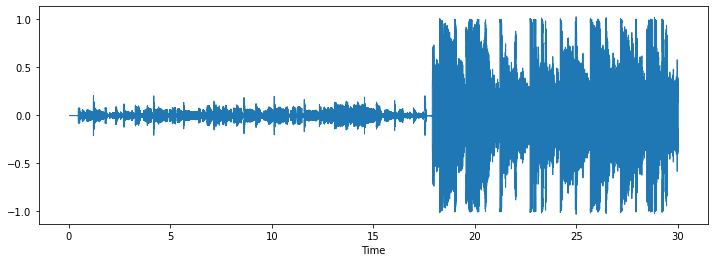

In [40]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(data)
plt.show()

c:\Users\lotap\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


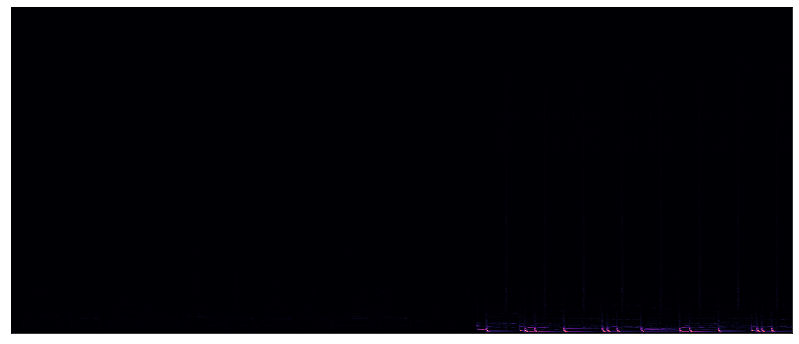

In [41]:
# create spectrogram of song
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft)

In [45]:
def trim_wav( originalWavPath, newWavPath , start, end ):
    '''
    :param originalWavPath: the path to the source wav file
    :param newWavPath: output wav file * can be same path as original
    :param start: time in seconds
    :param end: time in seconds
    :return:
    '''
    sampleRate, waveData = wavfile.read( originalWavPath )
    startSample = int( start * sampleRate )
    endSample = int( end * sampleRate )
    wavfile.write( newWavPath, sampleRate, waveData[startSample:endSample])
    
# grab music from an input directory containing .wav files
input_dir_path = 'Top_50_songs/input_dir/'
output_audio_path = 'Top_50_songs/output_audio_dir/'
output_images_path = 'Top_50_songs/output_images_dir/'

for file in os.listdir(input_dir_path):
    # trim not at the beginning, but 15 secs in the middle of the song
    trim_wav(input_dir_path+file, output_audio_path+file, 15, 45)
    # create spectrogram of song and save to output_images_dir
    data, sr = librosa.load(output_audio_path+file)
    stft = librosa.stft(data)
    stft_db = librosa.amplitude_to_db(abs(stft))
    plt.figure(figsize=(14,6))
    plt.savefig(output_images_path+file+'.png')
    # then manually move images and new clipped audio into Data...

<Figure size 1008x432 with 0 Axes>

In [9]:
####### feature extraction on Top 50 songs #######
features_data=[]
csv_path = 'Top_50_songs/Data/features_30_sec.csv'
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
features_header = ['filename', 'chroma_stft_mean', 'chroma_stft_var',	'rms_mean',	'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 
                   'spectral_bandwidth_var', 'rolloff_mean',	'rolloff_var',	'zero_crossing_rate_mean',	'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean',
                   'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var',	'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean',	'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',	'mfcc6_mean',	
                   'mfcc6_var',	'mfcc7_mean',	'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean',	'mfcc10_var',
                   'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',	
                   'mfcc16_mean', 'mfcc16_var',	'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var',	'mfcc20_mean',	'mfcc20_var',	'label']

with open(csv_path, 'w', newline='') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerow(features_header)
    for genre in genres:
        for file in os.listdir('Top_50_songs/Data/genres_original/'+genre):
            audio_recording = 'Top_50_songs/Data/genres_original/'+genre+'/'+file
            data, sr = librosa.load(audio_recording)
            # filename
            features_data.append(file)
            
            # chroma
            chroma = librosa.feature.chroma_stft(data, sr=sr)
            chroma_stft_mean= chroma.mean()
            features_data.append(chroma_stft_mean)
            chroma_stft_var= chroma.var()
            features_data.append(chroma_stft_var)
            
            # root mean square
            rms = librosa.feature.rms(data)
            rms_mean = rms.mean()
            features_data.append(rms_mean)
            rms_var = rms.var()
            features_data.append(rms_var)

            # spectral centroid
            spectral_centroid = librosa.feature.spectral_centroid(data, sr=sr)
            spectral_centroid_mean = spectral_centroid.mean()
            features_data.append(spectral_centroid_mean)
            spectral_centroid_var = spectral_centroid.var()
            features_data.append(spectral_centroid_var)
            
            # spectral bandwidth
            spectral_bandwidth = librosa.feature.spectral_bandwidth(data, sr=sr)
            spectral_bandwidth_mean = spectral_bandwidth.mean()
            features_data.append(spectral_bandwidth_mean)
            spectral_bandwidth_var = spectral_bandwidth.var()
            features_data.append(spectral_bandwidth_var)

            # spectral rolloff
            rolloff = librosa.feature.spectral_rolloff(data, sr=sr)
            rolloff_mean = rolloff.mean()
            features_data.append(rolloff_mean)
            rolloff_var = rolloff.var()
            features_data.append(rolloff_var)

            #zero crossing rate
            zero_crossing_rate = librosa.feature.zero_crossing_rate(data)
            zero_crossing_rate_mean = zero_crossing_rate.mean()
            features_data.append(zero_crossing_rate_mean)
            zero_crossing_rate_var = zero_crossing_rate.var()
            features_data.append(zero_crossing_rate_var)

            #harmony and perceptrual
            harmony, perceptrual = librosa.effects.hpss(data)

            harmony_mean = harmony.mean()
            features_data.append(harmony_mean)
            harmony_var = harmony.var()
            features_data.append(harmony_var)
            
            perceptrual_mean = perceptrual.mean()
            features_data.append(perceptrual_mean)
            perceptrual_var = perceptrual.var()
            features_data.append(perceptrual_var)

            #tempo
            tempo, beats = librosa.beat.beat_track(data)
            features_data.append(tempo)

            #mfcc1_mean and mfcc1_var...mfcc20
            mfccs = librosa.feature.mfcc(data, sr=sr)
            for mfcc in mfccs:
                features_data.append(np.mean(mfcc))
                features_data.append(np.var(mfcc))
            
            #label
            features_data.append(genre)
            
            # write all data to row
            writer.writerow(features_data)
            features_data=[]
            
writeFile.close()

/home/zgohar/.local/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03231914 -0.05666508
 -0.1160189 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/zgohar/.local/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03231914 -0.05666508
 -0.1160189 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/zgohar/.local/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03231914 -0.05666508
 -0.1160189 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/zgohar/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03231914 -0.05666508
 -0.1160189 ] as keywor